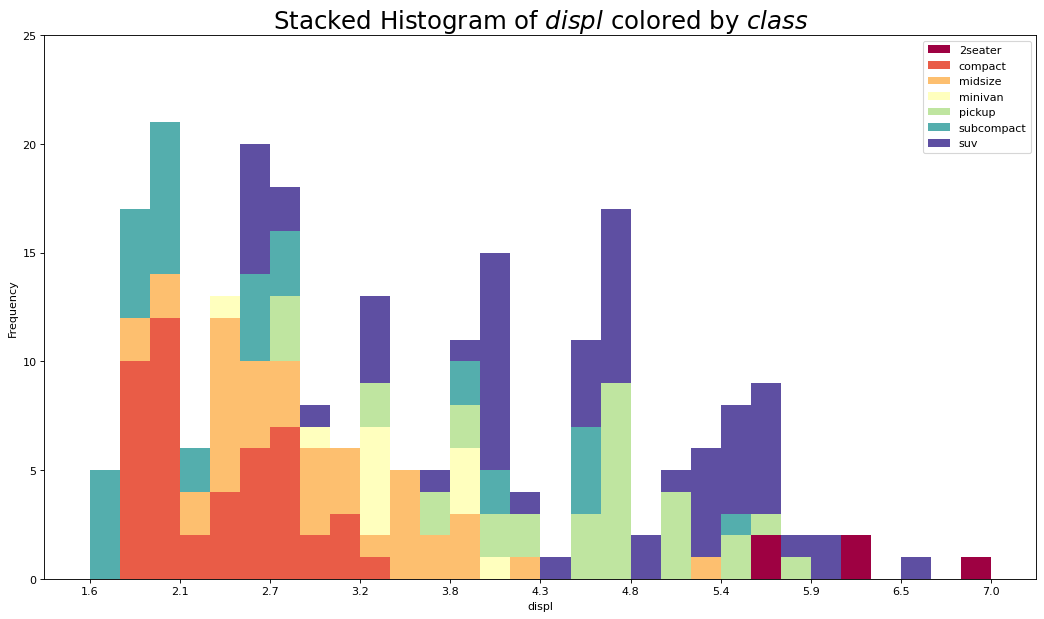

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()